In [84]:
import os.path
import pandas

In [85]:
#file_path = r'C:\Users\Arpan Ghosh\Desktop\baba.xlsx'
file_path = input("Enter the path of .xlsx excel file : ")
start_date = input("Enter the start date in YYYY-MM-DD format [Default first Entry] : ")
end_date = input("Enter the end date in YYYY-MM-DD format [Default end Entry] : ")
choice = input('Group by what? [D : Date / M : Month / W : Week / Y : Year] : ')
row_foot = input("Skip row and footer count seperated by space [ default 19 2 ] : ")
if row_foot == '':
    row_foot = '19 2'
skip_r = int(row_foot.split()[0])
skip_f = int(row_foot.split()[1])
data = pandas.read_excel(file_path,skiprows=skip_r,skipfooter=skip_f)
data['Credit'] = data['Credit'].apply(lambda x: 0 if x == ' ' else x)
data['Debit'] = data['Debit'].apply(lambda x: 0 if x == ' ' else x)
data.sort_values("Value Date",ascending = True, inplace = True) 
data.reset_index()
if start_date == '':
    start_date = str(data['Value Date'].min().date())
if end_date == '':
    end_date = str(data['Value Date'].max().date())

In [86]:
data['year_month_date'] = data['Value Date'].dt.to_period("D")
data['year_month'] = data['Value Date'].dt.to_period("M")
data['year'] = data['Value Date'].dt.to_period("Y")
data['week'] = data['Value Date'].dt.year.apply(str)+'_'+data['Value Date'].dt.week.apply(str)
#data['year_month_1'] = data['Value Date'].dt.month_name(locale = 'English') 
try:
    data['Debit'] = data['        Debit']
except KeyError as e:
    print(e)

'        Debit'


In [87]:
condition_1 = data['year_month_date']>=pandas.Period(start_date,'D')
condition_2 = data['year_month_date']<=pandas.Period(end_date,'D')
data = data[condition_1 & condition_2]

,Txn Date,Value Date,Description,Ref No./Cheque No.,Debit,Credit,Balance,year_month_date,year_month,year,week
77,2018-04-06,2018-04-06,BY TRANSFER-INB IMPS809615511323/0000000000...,MAA000117352298 MAA000117352298 ...,0.0,158101.86,334997.22,2018-04-06,2018-04,2018,2018_14
78,2018-04-10,2018-04-10,WITHDRAWAL TRANSFER---,TRANSFER TO 36534834035 ...,5000.0,0.00,329997.22,2018-04-10,2018-04,2018,2018_15
79,2018-04-10,2018-04-10,TO CLEARING-HDF SANEI MOTORS PRIVATE LIMI--4...,441725,80000.0,0.00,249997.22,2018-04-10,2018-04,2018,2018_15
80,2018-04-16,2018-04-16,TO CLEARING-UNI R K M A VIDYALAYA STUDENT--4...,441726,39000.0,0.00,210997.22,2018-04-16,2018-04,2018,2018_16
81,2018-04-24,2018-04-24,BY TRANSFER-721988687 21BZ1SB BLPGCM2511DT2...,TRANSFER FROM 4599417105216,0.0,186.91,211184.13,2018-04-24,2018-04,2018,2018_17
...,...,...,...,...,...,...,...,...,...,...,...
72,2019-12-11,2019-12-11,TO TRANSFER-INB State Bank Collect--,DUC4569349IGAHQHGQA8 TRANSFER TO...,44411.8,0.00,173672.03,2019-12-11,2019-12,2019,2019_50
73,2019-12-16,2019-12-16,BY TRANSFER-1233625477 BLPGCM50177DT1212 21...,TRANSFER FROM 4599379105217,0.0,174.24,173846.27,2019-12-16,2019-12,2019,2019_51
74,2019-12-20,2019-12-20,BY TRANSFER-NEFT*HDFC0000240*N3541910131430...,TRANSFER FROM 3199680044308,0.0,41221.74,215068.01,2019-12-20,2019-12,2019,2019_51
75,2019-12-25,2019-12-25,CREDIT INTEREST---,NaN,0.0,1911.00,216979.01,2019-12-25,2019-12,2019,2019_52


In [88]:
if choice == 'W':
    data_gb = data.groupby('week')
elif choice == 'M':
    data_gb = data.groupby('year_month')
elif choice == 'Y':
    data_gb = data.groupby('year')
elif choice == 'D':
    data_gb = data.groupby('year_month_date')
else:
    print("Wrong Choice !")
    exit()

Total Credit over the given Period : 634431.91
Total Debit over the given Period : 594177.36
Average Credit per week Over the given period : 9760.491
Average Debit per week Over the given period :9141.19
Average Retention per week Over the given period : 619.301
Standard Deviation of Credit : 35205.3125
Standard Deviation of Debit : 16576.1241
Maximum Balance was in this period : 429213.99
Minimum Balance was in this period : 173672.03
Maximum Credit was caused on 2018-11-15 00:00:00 by reference TRANSFER TO 11000687284 / 3559 because CHEQUE DEPOSIT---3559 making balance 418753.19
Maximum Debit was caused on 2018-04-10 00:00:00 by reference 441725 because TO CLEARING-HDF   SANEI MOTORS PRIVATE LIMI--441725 making balance 249997.22

File already exists ! want to replace ? (Y/N) : y


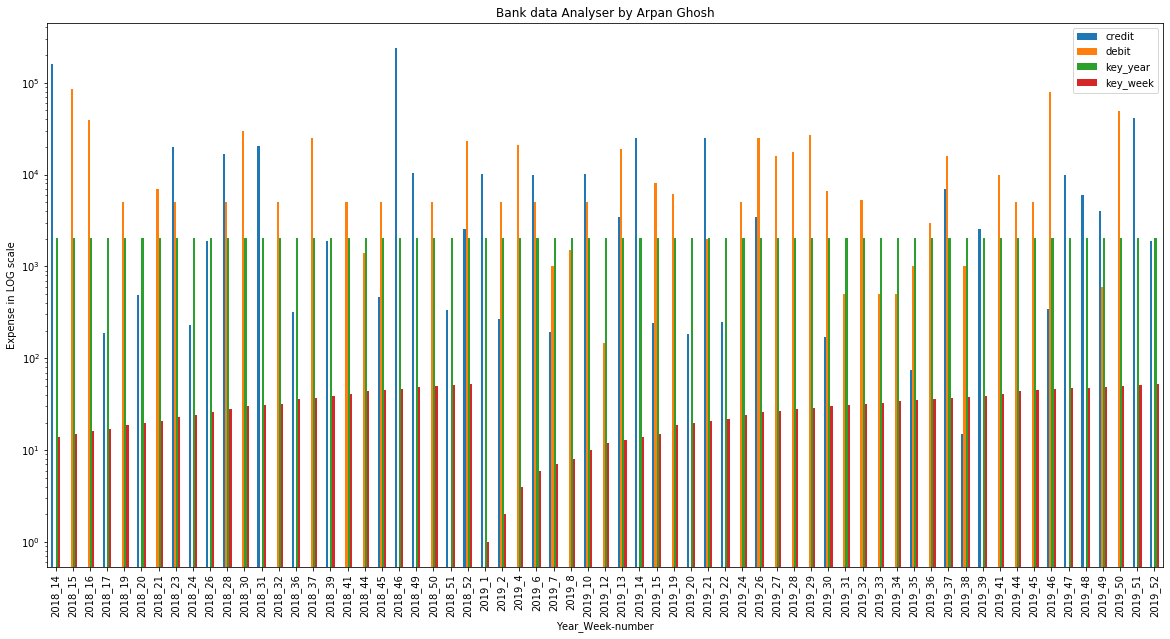

In [143]:
credit,debit,key_list = [],[],[]
Total_C = 0
Total_D = 0
count = 0
for key,df in data_gb:
    C = sum(df['Credit'].apply(lambda x: 0 if (x == ' ') else x).tolist())
    D = sum(df['Debit'].apply(lambda x: 0 if (x == ' ') else x).tolist())
    Total_C += C
    Total_D += D
    count += 1
    credit.append(C)
    debit.append(D)
    key_list.append(key)
summary = pandas.DataFrame({'key':key_list,'credit':credit,'debit':debit})
#summary.year_month = summary['key'].apply(pandas.Period.to_timestamp)
if choice == 'W':
    summary['key_year'] = summary['key']
    summary['key_week'] = summary['key']
    summary['key_year'] = summary['key_year'].apply(lambda x : int(x.split('_')[0]))
    summary.key_year = summary.key_year.astype(int)
    summary['key_week'] = summary['key_week'].apply(lambda x : int(x.split('_')[1]))
    summary.key_week = summary.key_week.astype(int)
    summary = summary.sort_values(['key_year','key_week'])
    summary.drop(columns=['key_week', 'key_year'])
else:
    summary = summary.sort_values('key',ascending = False)

if choice == 'W':
    summary['key_'] = summary['key']
elif choice == 'M':
    summary['key_'] = summary['key'].apply(lambda x : x.strftime("%Y-%b"))
elif choice == 'Y':
    summary['key_'] = summary['key'].apply(lambda x : x.strftime("%Y"))
elif choice == 'D':
    summary['key_'] = summary['key'].apply(lambda x : x.strftime("%Y-%b-%d"))
if choice != 'W':
    ax = summary.plot(kind = 'bar',figsize=(20,10),x = 'key',grid = False,title = 'Bank data Analyser by Arpan Ghosh',logy = True)
else:
    ax = summary.plot(kind = 'bar',figsize=(20,10),grid = False,title = 'Bank data Analyser by Arpan Ghosh',logy = True)
ax.set_xticklabels(summary['key_'])
if choice == 'W':
    ax.set_xlabel("Year_Week-number")
    what = 'week'
elif choice == 'M':
    ax.set_xlabel("Year_Month-name")
    what = 'month'
elif choice == 'Y':
    ax.set_xlabel("Year")
    what = 'year'
elif choice == 'D':
    ax.set_xlabel("Date")
    what = 'day'

ax.set_ylabel("Expense in LOG scale")
#ax.set_ylim(0, 3000)
figure = ax.get_figure()
Max_C = data[data.Credit == data.Credit.max()]
Max_D = data[data.Debit == data.Debit.max()]
info = "Total Credit over the given Period : "+str(round(Total_C,3))+'\n'+"Total Debit over the given Period : "+str(round(Total_D,3))+'\n'+"Average Credit per "+what+" Over the given period : "+str(round((Total_C/count),3))+'\n'+"Average Debit per "+what+" Over the given period :"+str(round(Total_D/count,3))+'\n'+"Average Retention per "+what+" Over the given period : "+str(round((Total_C-Total_D)/count,3))+'\n'+"Standard Deviation of Credit : "+str(round(summary.credit.std(ddof=0),4))+'\n'+"Standard Deviation of Debit : "+str(round(summary.debit.std(ddof=0),4))+'\n'+"Maximum Balance was in this period : "+str(data[data.Balance == data.Balance.max()]['Balance'].to_list()[0])+'\n'+"Minimum Balance was in this period : "+str(data[data.Balance == data.Balance.min()]['Balance'].to_list()[0])+'\n'
info += "Maximum Credit was caused on "+str(Max_C['Value Date'].to_list()[0])+" by reference "+str(Max_C['Ref No./Cheque No.'].to_list()[0])+" because "+str(Max_C['Description'].to_list()[0])+' making balance '+str(Max_C['Balance'].to_list()[0])+'\n'+"Maximum Debit was caused on "+str(Max_D['Value Date'].to_list()[0])
info += " by reference "+str(Max_D['Ref No./Cheque No.'].to_list()[0])+" because "
info += str(Max_D['Description'].to_list()[0])+' making balance '+str(Max_D['Balance'].to_list()[0])+'\n'
print(info)
out_path = os.path.abspath(os.path.join(file_path, os.pardir))
if os.path.exists(out_path+'\\chart.pdf'):
    inp = input("File already exists ! want to replace ? (Y/N) : ")
    if inp == 'Y' or inp == 'y':
        out_path_pdf = out_path+'\\chart.pdf'
        out_path_txt = out_path+'\\chart.txt'
    else:
        name = input("Enter the file name only : ")
        out_path_pdf = out_path+"\\"+name+".pdf"
        out_path_txt = out_path+"\\"+name+".txt"
else:
    out_path_pdf = out_path+'\\chart.pdf'
    out_path_txt = out_path+'\\chart.txt'
out = open(out_path_txt,'w')
out.write(info)
out.close()
figure.savefig(os.path.abspath(os.path.join(file_path, os.pardir))+'\\chart.pdf')